In [1]:
### Imports 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.gridspec import GridSpec
import seaborn as sb
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR, SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

## The Aim in this notebook, like the previous one is to study the performances of SVR ( Support Vector Regression )  algorithm for the specific task of predicting the prices of Airbnb listings in Berlin. 

## I / Preprocessing 

Here we will go from the same csv as the one gotten at the end of the preprocessing from the Random Forest notebook. 

In [2]:
df_data_2 = pd.read_csv('train_airbnb_berlin_preprocessed_phase2.csv', sep=';')
## df_data_2 = pd.read_csv('../../data/train_airbnb_berlin_preprocessed_phase2.csv', sep=';')
df_data_2.head()

,Host Since,Host Response Rate,Is Superhost,Latitude,Longitude,Is Exact Location,Accomodates,Bathrooms,Bedrooms,Beds,...,Neighborhood Group_NeukÃ¶lln,Neighborhood Group_Pankow,Neighborhood Group_Reinickendorf,Neighborhood Group_Spandau,Neighborhood Group_Steglitz - Zehlendorf,Neighborhood Group_Tempelhof - SchÃ¶neberg,Neighborhood Group_Treptow - KÃ¶penick,Boy or Girl?_Boy,Boy or Girl?_Girl,Distance from barycenter
0,1206,NaN,0.0,52.54652,13.41792,0.0,2.0,1.0,1.0,1.0,...,0,1,0,0,0,0,0,1,0,0.038097
1,2224,NaN,0.0,52.56512,13.42214,0.0,2.0,1.0,2.0,2.0,...,0,1,0,0,0,0,0,0,1,0.057150
2,1188,NaN,0.0,52.54741,13.42521,0.0,3.0,1.0,1.0,2.0,...,0,1,0,0,0,0,0,1,0,0.041516
3,318,NaN,0.0,52.50958,13.45144,0.0,2.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0.044018
4,2185,92.0,1.0,52.52995,13.41558,1.0,3.0,1.0,1.0,2.0,...,0,1,0,0,0,0,0,0,1,0.021648


## II / Split to obtain the Train - Test sets

We use the same split as the Random Forest notebook, so no need to print the graph of all the distributions 

In [3]:
y = df_data_2['Price']
X = df_data_2.drop(['Price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## III/ First rough application of the algorithm with mean imputation 

In [4]:
from sklearn.impute import SimpleImputer
pipe = Pipeline([('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
                    ('svr', SVR(C=10, epsilon=0))])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

## Metrics 
mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

### Printing the metrics 
print(f'MSE : {mse}')
print(f'MAE : {mae}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

MSE : 2104.622794905578
MAE : 27.647137101511998
RMSE: 45.87616804949578
R2 Score: -0.0628513740905734


The results are not great ! : \
- MSE : 2104.622794905578
- MAE : 27.647137101511998
- RMSE: 45.87616804949578
- R2 Score: -0.0628513740905734

Moreover the R2 score is negatif which proves that the model is less effectif then if we predicted the mean price everytime.

Let's see if we can get a better score ! 

## IV/ Now let's try to make this algorithme better ! 

### A/ Imputation 

We will test 2 types of imputations :
Mean
Median

In [5]:
## Mean 
pipe = Pipeline([('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
                    ('svr', SVR(C=10, epsilon=0))])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_test)

## Metrics 
mse = mean_squared_error(y_train_pred, y_test)
mae = mean_absolute_error(y_train_pred, y_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_train_pred)

### Printing the metrics 
print(f'MSE : {mse}')
print(f'MAE : {mae}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

MSE : 2104.622794905578
MAE : 27.647137101511998
RMSE: 45.87616804949578
R2 Score: -0.0628513740905734


In [6]:
## Median 
pipe = Pipeline([('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
                    ('svr', SVR(C=10,epsilon=0))])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_test)

## Metrics 
mse = mean_squared_error(y_train_pred, y_test)
mae = mean_absolute_error(y_train_pred, y_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_train_pred)

### Printing the metrics 
print(f'MSE : {mse}')
print(f'MAE : {mae}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

MSE : 2104.181828130314
MAE : 27.64695435303018
RMSE: 45.871361742707336
R2 Score: -0.06262868233595031


The difference is not huge but with median imputation we get a better result. So lets go with that ! 

### B/ Standardization 

For SVR we will get better results if we scale the values between -1 and 1. Therefore let's do a standardization on the values 

In [7]:
pipeline = Pipeline([ ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
                      ('scaler', StandardScaler()),
                      ('svr', SVR(C=10, epsilon=0))])


pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


## Metrics 
mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

### Printing the metrics 
print(f'MSE : {mse}')
print(f'MAE : {mae}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

MSE : 1156.1630749951876
MAE : 19.49124445906141
RMSE: 34.00239807712373
R2 Score: 0.41612838371516914


Just with this Standardization the score drops significantly ! And the R2 is no longer negatif ! 

- MSE : 1156.1630749951876
- MAE : 19.49124445906141
- RMSE: 34.00239807712373
- R2 Score: 0.41612838371516914

### C/ Curse of dimensionality --> Feature reduction 

In this part we will explore the feature reduction for SVR We will test and see what we could get ! 

#### i / PCA 

Let see if we do a PCA and fit the model with it, what the result might be 

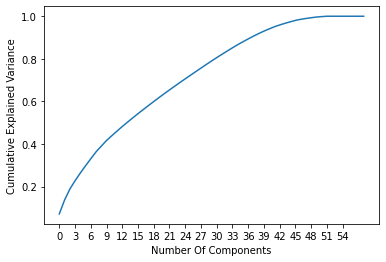

In [8]:
from sklearn.decomposition import PCA

pipe = Pipeline([ ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
                      ('scaler', StandardScaler()),
                      ('pca', PCA())])

pipe.fit(X_train)

## plot number of components in fonction of cumulative explained variance betweent 0 and 10 
plt.plot(np.cumsum(pipe['pca'].explained_variance_ratio_))
plt.xlabel('Number Of Components')
plt.xticks(np.arange(0, 55, 3))
plt.ylabel('Cumulative Explained Variance')
plt.show()


Most of the variance is explained by 48 components. We don't really have a reduction in termes of features. We will still launch a test with these components to see what we get

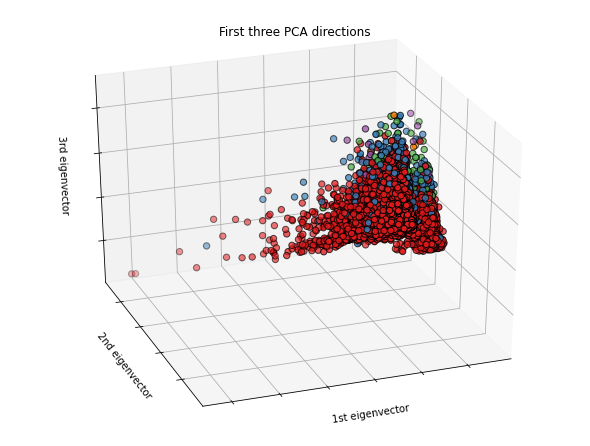

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

pipe = Pipeline([ ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
                      ('scaler', StandardScaler()),
                      ('pca', pca)])

pipe.fit(X_train)

X_train_pca = pipe.transform(X_train)
X_test_pca = pipe.transform(X_test)
# visualize the data in 3D

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=y_train, cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()

Here we see that with only 3 components we can't explain the entire dataset. But lets see the rmse with the 48 components like previously as ouR entry for the SVR model. 

In [10]:
pipe = Pipeline([ ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
                      ('scaler', StandardScaler()),
                      ('pca',PCA(n_components=48)),
                      ('svr', SVR())])



pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

## Metrics 
mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

### Printing the metrics 
print(f'MSE : {mse}')
print(f'MAE : {mae}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')


MSE : 1343.145347844311
MAE : 20.511161136791596
RMSE: 36.64894743160178
R2 Score: 0.32170083778659564


The mse and rmse are higher, so we will drop this feature reduction method ! 

#### ii/ Forward feature selection 

In [ ]:
## Changing X_train 
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median.fit(X_train)
X_train_imp = imp_median.transform(X_train)

scaler = StandardScaler()
scaler.fit(X_train_imp)
X_train_imp = scaler.transform(X_train_imp)

X_train_imp = pd.DataFrame(X_train_imp, columns=X_train.columns)

In [ ]:
from sklearn.model_selection import KFold
from sklearn import model_selection

model = SVR(C=10,epsilon=0).fit(X_train_imp,y_train)
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=0)

def processSubset(feature_set):
    
    # Fit decision tree model on feature_set and calculate score
    score = -1 * model_selection.cross_val_score(model, X_train_imp[list(feature_set)],
                                                 y_train.ravel(),
                                                 cv=kf_10,
                                                 scoring='neg_mean_squared_error').mean()

    return {"model":list(feature_set), "MSE":score}

In [ ]:
import time 
import itertools

def forward(features):

    # Pull out features we still need to process
    remaining_features = [d for d in X_train_imp.columns if d not in features]

    tic = time.time()
    
    results = []
    
    for d in remaining_features:
        results.append(processSubset(features+[d]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    
    best_model = models.loc[models['MSE'].argmin()]
    
    toc = time.time()

    print("Processed", models.shape[0], "models on", len(features)+1, "features in", (toc-tic), "seconds.")
    
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [ ]:
from tqdm import tqdm
models_fwd = pd.DataFrame(columns=["model","MSE"])
features = []
tic = time.time()
header = ["feature set", "RSS"]

for i in tqdm(range(1,len(X_train_imp.columns)+1)):    
    models_fwd.loc[i] = forward(features)
    features = models_fwd.loc[i]["model"]
    print(features)
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

### This took to long to run, we will keep on going

### D/Grid Search 

In [ ]:
model_svr = SVR()
params_grid = {'kernel':['linear','rbf'],
               'C':[0.0001,0.001,0.01,0.1,1,5,10],
               'epsilon':[0.001,0.01,0.1,0,1,2,5] } 

model_search_svr = RandomizedSearchCV(model_svr, params_grid, scoring='neg_root_mean_squared_error', cv=10, n_jobs=-1, return_train_score=True)

model_search_svr.fit(X_train, y_train)

In [ ]:
print(f'Best parameters are {model_search_svr.best_params_}') 
print(f'Best score is {model_search_svr.best_score_ * -1}')
print(f'Best model is {model_search_svr.best_estimator_}')
print("scores {}".format(model_search_svr.cv_results_['mean_test_score']))

This took too long, and I found a better approach that might have better results, and trains faster then regular SVR. So we will do Grid search and features selection on that approch 

## V/ One more Approach : LinearSVR 

### A/ First test 

In [11]:
pipe = Pipeline([ ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
                      ('scaler', StandardScaler()),
                      ('lin_svr',LinearSVR())])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

## Metrics 
mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
### Printing the metrics 
print(f'MSE : {mse}')
print(f'MAE : {mae}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')


MSE : 1114.5003464616125
MAE : 19.352122372429648
RMSE: 33.38413315426376
R2 Score: 0.4371683954348272


It is lower then regular SVR, so we will continue with this version 

### B/ Grid Search for linearSVR 

Lets do a grid search. We will try different values for each parameters except dual. As when we set dual to True there is an error message. So we will just let it at False 

In [30]:
## Changing X_train 
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median.fit(X_train)
X_train_imp = imp_median.transform(X_train)

scaler = StandardScaler()
scaler.fit(X_train_imp)
X_train_scaled = scaler.transform(X_train_imp)


param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'loss': ['epsilon_insensitive', 'squared_epsilon_insensitive'], 
              'dual': [False],
              'tol': [0.0001, 0.00001]} 

grid_lin_svr = GridSearchCV(LinearSVR(), param_grid, refit = True, verbose = 10, n_jobs=-1, cv=5,scoring="neg_mean_squared_error") 

grid_lin_svr.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_classes.py", line 499, in fit
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 1185, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "/usr/loc

GridSearchCV(cv=5, estimator=LinearSVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'dual': [False],
                         'loss': ['epsilon_insensitive',
                                  'squared_epsilon_insensitive'],
                         'tol': [0.0001, 1e-05]},
             scoring='neg_mean_squared_error', verbose=10)

In [31]:
print(f'Best parameters are {grid_lin_svr.best_params_}') 
print(f'Best score is {grid_lin_svr.best_score_ * -1}')
print(f'Best model is {grid_lin_svr.best_estimator_}')
print("scores {}".format(grid_lin_svr.cv_results_['mean_test_score']))

Best parameters are {'C': 0.1, 'dual': False, 'loss': 'squared_epsilon_insensitive', 'tol': 0.0001}
Best score is 1455.1352445069274
Best model is LinearSVR(C=0.1, dual=False, loss='squared_epsilon_insensitive')
scores [           nan            nan -1455.13524451 -1455.13790222
            nan            nan -1455.149402   -1455.15212134
            nan            nan -1455.15092659 -1455.15365218
            nan            nan -1455.15108014 -1455.15380636
            nan            nan -1455.1510955  -1455.15382179]


Lets look at the score for this Linear SVR with the tuned hyperparameters. 

In [12]:
pipe = Pipeline([ ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
                      ('scaler', StandardScaler()),
                      ('lin_svr', LinearSVR(C= 0.1, dual= False, loss='squared_epsilon_insensitive', tol=0.0001))])

pipe.fit(X_train, y_train)

preds_svr_best = pipe.predict(X_test)


mse_svr_best = mean_squared_error(preds_svr_best, y_test)
mae_svr_best = mean_absolute_error(preds_svr_best, y_test)
rmse_svr_best = np.sqrt(mse_svr_best)
r2_svr_best = r2_score(y_test, preds_svr_best)

print(f'MSE : {mse_svr_best}')
print(f'MAE : {mae_svr_best}')
print(f'RMSE: {rmse_svr_best}')
print(f'R2 Score: {r2_svr_best}')

MSE : 1033.6208787903295
MAE : 20.314704470247296
RMSE: 32.14997478677595
R2 Score: 0.478013174631469


The scores are pretty good : 
- MSE : 1033.6208787903295
- MAE : 20.314704470247296
- RMSE: 32.14997478677595
- R2 Score: 0.478013174631469


### C/Forward feature selections 

In [44]:
## Changing X_train 
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median.fit(X_train)
X_train_imp = imp_median.transform(X_train)

scaler = StandardScaler()
scaler.fit(X_train_imp)
X_train_imp = scaler.transform(X_train_imp)

X_train_imp = pd.DataFrame(X_train_imp, columns=X_train.columns)

## X_test 
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median.fit(X_test)
X_test_imp = imp_median.transform(X_test)

scaler = StandardScaler()
scaler.fit(X_test_imp)
X_test_imp = scaler.transform(X_test_imp)
X_test_imp = pd.DataFrame(X_test_imp, columns=X_test.columns)


In [29]:
from sklearn.model_selection import KFold
from sklearn import model_selection

model = LinearSVR(C= 0.1, dual= False, loss='squared_epsilon_insensitive', tol=0.0001).fit(X_train_imp,y_train)
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=0)

def processSubset(feature_set):
    
    # Fit decision tree model on feature_set and calculate score
    score = -1 * model_selection.cross_val_score(model, X_train_imp[list(feature_set)],
                                                 y_train.ravel(),
                                                 cv=kf_10,
                                                 scoring='neg_mean_squared_error').mean()

    return {"model":list(feature_set), "MSE":score}

In [30]:
import time 
import itertools

def forward(features):

    # Pull out features we still need to process
    remaining_features = [d for d in X_train_imp.columns if d not in features]

    tic = time.time()
    
    results = []
    
    for d in remaining_features:
        results.append(processSubset(features+[d]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    
    best_model = models.loc[models['MSE'].argmin()]
    
    toc = time.time()

    print("Processed", models.shape[0], "models on", len(features)+1, "features in", (toc-tic), "seconds.")
    
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [31]:
from tqdm import tqdm
models_fwd = pd.DataFrame(columns=["model","MSE"])
features = []
tic = time.time()
header = ["feature set", "RSS"]

for i in tqdm(range(1,len(X_train_imp.columns)+1)):    
    models_fwd.loc[i] = forward(features)
    features = models_fwd.loc[i]["model"]
    print(features)
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

  2%|▏         | 1/59 [00:05<05:04,  5.25s/it]

Processed 59 models on 1 features in 5.238628149032593 seconds.
['Accomodates']


  3%|▎         | 2/59 [00:10<05:14,  5.52s/it]

Processed 58 models on 2 features in 5.694296836853027 seconds.
['Accomodates', 'Room Type_Entire home/apt']


  5%|▌         | 3/59 [00:17<05:25,  5.81s/it]

Processed 57 models on 3 features in 6.154067754745483 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms']


  7%|▋         | 4/59 [00:22<05:17,  5.76s/it]

Processed 56 models on 4 features in 5.681469202041626 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft']


  8%|▊         | 5/59 [00:28<05:13,  5.80s/it]

Processed 55 models on 5 features in 5.852019309997559 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms']


 10%|█         | 6/59 [00:35<05:22,  6.09s/it]

Processed 54 models on 6 features in 6.639199495315552 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel']


 12%|█▏        | 7/59 [00:42<05:39,  6.53s/it]

Processed 53 models on 7 features in 7.427852392196655 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter']


 14%|█▎        | 8/59 [00:52<06:21,  7.47s/it]

Processed 52 models on 8 features in 9.473724126815796 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included']


 15%|█▌        | 9/59 [01:02<06:56,  8.33s/it]

Processed 51 models on 9 features in 10.20136308670044 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment']


 17%|█▋        | 10/59 [01:12<07:19,  8.97s/it]

Processed 50 models on 10 features in 10.389155626296997 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment', 'Neighborhood Group_Charlottenburg-Wilm.']


 19%|█▊        | 11/59 [01:23<07:38,  9.54s/it]

Processed 49 models on 11 features in 10.821380376815796 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment', 'Neighborhood Group_Charlottenburg-Wilm.', 'Host Response Time_unknown']


 20%|██        | 12/59 [01:34<07:47,  9.94s/it]

Processed 48 models on 12 features in 10.840118169784546 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment', 'Neighborhood Group_Charlottenburg-Wilm.', 'Host Response Time_unknown', 'Neighborhood Group_NeukÃ¶lln']


 22%|██▏       | 13/59 [01:45<07:52, 10.26s/it]

Processed 47 models on 13 features in 10.978811025619507 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment', 'Neighborhood Group_Charlottenburg-Wilm.', 'Host Response Time_unknown', 'Neighborhood Group_NeukÃ¶lln', 'Cleanliness Rating']


 24%|██▎       | 14/59 [01:56<07:48, 10.42s/it]

Processed 46 models on 14 features in 10.765196323394775 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment', 'Neighborhood Group_Charlottenburg-Wilm.', 'Host Response Time_unknown', 'Neighborhood Group_NeukÃ¶lln', 'Cleanliness Rating', 'Neighborhood Group_Mitte']


 25%|██▌       | 15/59 [02:07<07:44, 10.55s/it]

Processed 45 models on 15 features in 10.843916893005371 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment', 'Neighborhood Group_Charlottenburg-Wilm.', 'Host Response Time_unknown', 'Neighborhood Group_NeukÃ¶lln', 'Cleanliness Rating', 'Neighborhood Group_Mitte', 'Min Nights']


 27%|██▋       | 16/59 [02:18<07:49, 10.92s/it]

Processed 44 models on 16 features in 11.758453130722046 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment', 'Neighborhood Group_Charlottenburg-Wilm.', 'Host Response Time_unknown', 'Neighborhood Group_NeukÃ¶lln', 'Cleanliness Rating', 'Neighborhood Group_Mitte', 'Min Nights', 'Location Rating']


 29%|██▉       | 17/59 [02:30<07:48, 11.16s/it]

Processed 43 models on 17 features in 11.701994895935059 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment', 'Neighborhood Group_Charlottenburg-Wilm.', 'Host Response Time_unknown', 'Neighborhood Group_NeukÃ¶lln', 'Cleanliness Rating', 'Neighborhood Group_Mitte', 'Min Nights', 'Location Rating', 'Value Rating']


 31%|███       | 18/59 [02:43<07:54, 11.57s/it]

Processed 42 models on 18 features in 12.51486086845398 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment', 'Neighborhood Group_Charlottenburg-Wilm.', 'Host Response Time_unknown', 'Neighborhood Group_NeukÃ¶lln', 'Cleanliness Rating', 'Neighborhood Group_Mitte', 'Min Nights', 'Location Rating', 'Value Rating', 'Property Type_Boutique hotel']


 32%|███▏      | 19/59 [02:55<07:55, 11.88s/it]

Processed 41 models on 19 features in 12.583941459655762 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment', 'Neighborhood Group_Charlottenburg-Wilm.', 'Host Response Time_unknown', 'Neighborhood Group_NeukÃ¶lln', 'Cleanliness Rating', 'Neighborhood Group_Mitte', 'Min Nights', 'Location Rating', 'Value Rating', 'Property Type_Boutique hotel', 'Property Type_Condominium']


 34%|███▍      | 20/59 [03:08<07:53, 12.14s/it]

Processed 40 models on 20 features in 12.745256662368774 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment', 'Neighborhood Group_Charlottenburg-Wilm.', 'Host Response Time_unknown', 'Neighborhood Group_NeukÃ¶lln', 'Cleanliness Rating', 'Neighborhood Group_Mitte', 'Min Nights', 'Location Rating', 'Value Rating', 'Property Type_Boutique hotel', 'Property Type_Condominium', 'Overall Rating']


 36%|███▌      | 21/59 [03:21<07:55, 12.52s/it]

Processed 39 models on 21 features in 13.363630533218384 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment', 'Neighborhood Group_Charlottenburg-Wilm.', 'Host Response Time_unknown', 'Neighborhood Group_NeukÃ¶lln', 'Cleanliness Rating', 'Neighborhood Group_Mitte', 'Min Nights', 'Location Rating', 'Value Rating', 'Property Type_Boutique hotel', 'Property Type_Condominium', 'Overall Rating', 'Room Type_Private room']


 37%|███▋      | 22/59 [03:38<08:26, 13.70s/it]

Processed 38 models on 22 features in 16.449162244796753 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment', 'Neighborhood Group_Charlottenburg-Wilm.', 'Host Response Time_unknown', 'Neighborhood Group_NeukÃ¶lln', 'Cleanliness Rating', 'Neighborhood Group_Mitte', 'Min Nights', 'Location Rating', 'Value Rating', 'Property Type_Boutique hotel', 'Property Type_Condominium', 'Overall Rating', 'Room Type_Private room', 'Neighborhood Group_Tempelhof - SchÃ¶neberg']


 39%|███▉      | 23/59 [03:55<08:47, 14.66s/it]

Processed 37 models on 23 features in 16.882210731506348 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment', 'Neighborhood Group_Charlottenburg-Wilm.', 'Host Response Time_unknown', 'Neighborhood Group_NeukÃ¶lln', 'Cleanliness Rating', 'Neighborhood Group_Mitte', 'Min Nights', 'Location Rating', 'Value Rating', 'Property Type_Boutique hotel', 'Property Type_Condominium', 'Overall Rating', 'Room Type_Private room', 'Neighborhood Group_Tempelhof - SchÃ¶neberg', 'Latitude']


 41%|████      | 24/59 [04:12<08:58, 15.39s/it]

Processed 36 models on 24 features in 17.06018567085266 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment', 'Neighborhood Group_Charlottenburg-Wilm.', 'Host Response Time_unknown', 'Neighborhood Group_NeukÃ¶lln', 'Cleanliness Rating', 'Neighborhood Group_Mitte', 'Min Nights', 'Location Rating', 'Value Rating', 'Property Type_Boutique hotel', 'Property Type_Condominium', 'Overall Rating', 'Room Type_Private room', 'Neighborhood Group_Tempelhof - SchÃ¶neberg', 'Latitude', 'Neighborhood Group_Treptow - KÃ¶penick']


 42%|████▏     | 25/59 [04:30<09:14, 16.30s/it]

Processed 35 models on 25 features in 18.40316939353943 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment', 'Neighborhood Group_Charlottenburg-Wilm.', 'Host Response Time_unknown', 'Neighborhood Group_NeukÃ¶lln', 'Cleanliness Rating', 'Neighborhood Group_Mitte', 'Min Nights', 'Location Rating', 'Value Rating', 'Property Type_Boutique hotel', 'Property Type_Condominium', 'Overall Rating', 'Room Type_Private room', 'Neighborhood Group_Tempelhof - SchÃ¶neberg', 'Latitude', 'Neighborhood Group_Treptow - KÃ¶penick', 'Neighborhood Group_Pankow']


 44%|████▍     | 26/59 [04:49<09:24, 17.11s/it]

Processed 34 models on 26 features in 18.993242740631104 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment', 'Neighborhood Group_Charlottenburg-Wilm.', 'Host Response Time_unknown', 'Neighborhood Group_NeukÃ¶lln', 'Cleanliness Rating', 'Neighborhood Group_Mitte', 'Min Nights', 'Location Rating', 'Value Rating', 'Property Type_Boutique hotel', 'Property Type_Condominium', 'Overall Rating', 'Room Type_Private room', 'Neighborhood Group_Tempelhof - SchÃ¶neberg', 'Latitude', 'Neighborhood Group_Treptow - KÃ¶penick', 'Neighborhood Group_Pankow', 'Longitude']


 46%|████▌     | 27/59 [05:09<09:34, 17.97s/it]

Processed 33 models on 27 features in 19.944148063659668 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment', 'Neighborhood Group_Charlottenburg-Wilm.', 'Host Response Time_unknown', 'Neighborhood Group_NeukÃ¶lln', 'Cleanliness Rating', 'Neighborhood Group_Mitte', 'Min Nights', 'Location Rating', 'Value Rating', 'Property Type_Boutique hotel', 'Property Type_Condominium', 'Overall Rating', 'Room Type_Private room', 'Neighborhood Group_Tempelhof - SchÃ¶neberg', 'Latitude', 'Neighborhood Group_Treptow - KÃ¶penick', 'Neighborhood Group_Pankow', 'Longitude', 'Property Type_Hostel']


 47%|████▋     | 28/59 [05:28<09:26, 18.29s/it]

Processed 32 models on 28 features in 19.030600786209106 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment', 'Neighborhood Group_Charlottenburg-Wilm.', 'Host Response Time_unknown', 'Neighborhood Group_NeukÃ¶lln', 'Cleanliness Rating', 'Neighborhood Group_Mitte', 'Min Nights', 'Location Rating', 'Value Rating', 'Property Type_Boutique hotel', 'Property Type_Condominium', 'Overall Rating', 'Room Type_Private room', 'Neighborhood Group_Tempelhof - SchÃ¶neberg', 'Latitude', 'Neighborhood Group_Treptow - KÃ¶penick', 'Neighborhood Group_Pankow', 'Longitude', 'Property Type_Hostel', 'Neighborhood Group_Reinickendorf']


 49%|████▉     | 29/59 [05:47<09:09, 18.30s/it]

Processed 31 models on 29 features in 18.33222484588623 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment', 'Neighborhood Group_Charlottenburg-Wilm.', 'Host Response Time_unknown', 'Neighborhood Group_NeukÃ¶lln', 'Cleanliness Rating', 'Neighborhood Group_Mitte', 'Min Nights', 'Location Rating', 'Value Rating', 'Property Type_Boutique hotel', 'Property Type_Condominium', 'Overall Rating', 'Room Type_Private room', 'Neighborhood Group_Tempelhof - SchÃ¶neberg', 'Latitude', 'Neighborhood Group_Treptow - KÃ¶penick', 'Neighborhood Group_Pankow', 'Longitude', 'Property Type_Hostel', 'Neighborhood Group_Reinickendorf', 'Property Type_Apartment']


 51%|█████     | 30/59 [06:07<09:10, 19.00s/it]

Processed 30 models on 30 features in 20.6112277507782 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment', 'Neighborhood Group_Charlottenburg-Wilm.', 'Host Response Time_unknown', 'Neighborhood Group_NeukÃ¶lln', 'Cleanliness Rating', 'Neighborhood Group_Mitte', 'Min Nights', 'Location Rating', 'Value Rating', 'Property Type_Boutique hotel', 'Property Type_Condominium', 'Overall Rating', 'Room Type_Private room', 'Neighborhood Group_Tempelhof - SchÃ¶neberg', 'Latitude', 'Neighborhood Group_Treptow - KÃ¶penick', 'Neighborhood Group_Pankow', 'Longitude', 'Property Type_Hostel', 'Neighborhood Group_Reinickendorf', 'Property Type_Apartment', 'Property Type_Townhouse']


 53%|█████▎    | 31/59 [06:26<08:53, 19.05s/it]

Processed 29 models on 31 features in 19.13988709449768 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment', 'Neighborhood Group_Charlottenburg-Wilm.', 'Host Response Time_unknown', 'Neighborhood Group_NeukÃ¶lln', 'Cleanliness Rating', 'Neighborhood Group_Mitte', 'Min Nights', 'Location Rating', 'Value Rating', 'Property Type_Boutique hotel', 'Property Type_Condominium', 'Overall Rating', 'Room Type_Private room', 'Neighborhood Group_Tempelhof - SchÃ¶neberg', 'Latitude', 'Neighborhood Group_Treptow - KÃ¶penick', 'Neighborhood Group_Pankow', 'Longitude', 'Property Type_Hostel', 'Neighborhood Group_Reinickendorf', 'Property Type_Apartment', 'Property Type_Townhouse', 'Property Type_House']


 54%|█████▍    | 32/59 [06:47<08:43, 19.39s/it]

Processed 28 models on 32 features in 20.178969860076904 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment', 'Neighborhood Group_Charlottenburg-Wilm.', 'Host Response Time_unknown', 'Neighborhood Group_NeukÃ¶lln', 'Cleanliness Rating', 'Neighborhood Group_Mitte', 'Min Nights', 'Location Rating', 'Value Rating', 'Property Type_Boutique hotel', 'Property Type_Condominium', 'Overall Rating', 'Room Type_Private room', 'Neighborhood Group_Tempelhof - SchÃ¶neberg', 'Latitude', 'Neighborhood Group_Treptow - KÃ¶penick', 'Neighborhood Group_Pankow', 'Longitude', 'Property Type_Hostel', 'Neighborhood Group_Reinickendorf', 'Property Type_Apartment', 'Property Type_Townhouse', 'Property Type_House', 'Is Superhost']


 56%|█████▌    | 33/59 [07:08<08:37, 19.91s/it]

Processed 27 models on 33 features in 21.118303537368774 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment', 'Neighborhood Group_Charlottenburg-Wilm.', 'Host Response Time_unknown', 'Neighborhood Group_NeukÃ¶lln', 'Cleanliness Rating', 'Neighborhood Group_Mitte', 'Min Nights', 'Location Rating', 'Value Rating', 'Property Type_Boutique hotel', 'Property Type_Condominium', 'Overall Rating', 'Room Type_Private room', 'Neighborhood Group_Tempelhof - SchÃ¶neberg', 'Latitude', 'Neighborhood Group_Treptow - KÃ¶penick', 'Neighborhood Group_Pankow', 'Longitude', 'Property Type_Hostel', 'Neighborhood Group_Reinickendorf', 'Property Type_Apartment', 'Property Type_Townhouse', 'Property Type_House', 'Is Superhost', 'Communication Rating']


 58%|█████▊    | 34/59 [07:32<08:48, 21.14s/it]

Processed 26 models on 34 features in 24.007341384887695 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment', 'Neighborhood Group_Charlottenburg-Wilm.', 'Host Response Time_unknown', 'Neighborhood Group_NeukÃ¶lln', 'Cleanliness Rating', 'Neighborhood Group_Mitte', 'Min Nights', 'Location Rating', 'Value Rating', 'Property Type_Boutique hotel', 'Property Type_Condominium', 'Overall Rating', 'Room Type_Private room', 'Neighborhood Group_Tempelhof - SchÃ¶neberg', 'Latitude', 'Neighborhood Group_Treptow - KÃ¶penick', 'Neighborhood Group_Pankow', 'Longitude', 'Property Type_Hostel', 'Neighborhood Group_Reinickendorf', 'Property Type_Apartment', 'Property Type_Townhouse', 'Property Type_House', 'Is Superhost', 'Communication Rating', 'Host Since']


 59%|█████▉    | 35/59 [07:53<08:24, 21.04s/it]

Processed 25 models on 35 features in 20.776052474975586 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment', 'Neighborhood Group_Charlottenburg-Wilm.', 'Host Response Time_unknown', 'Neighborhood Group_NeukÃ¶lln', 'Cleanliness Rating', 'Neighborhood Group_Mitte', 'Min Nights', 'Location Rating', 'Value Rating', 'Property Type_Boutique hotel', 'Property Type_Condominium', 'Overall Rating', 'Room Type_Private room', 'Neighborhood Group_Tempelhof - SchÃ¶neberg', 'Latitude', 'Neighborhood Group_Treptow - KÃ¶penick', 'Neighborhood Group_Pankow', 'Longitude', 'Property Type_Hostel', 'Neighborhood Group_Reinickendorf', 'Property Type_Apartment', 'Property Type_Townhouse', 'Property Type_House', 'Is Superhost', 'Communication Rating', 'Host Since', 'Neighborhood Group_Friedrichshain-Kreuzberg']


 61%|██████    | 36/59 [08:17<08:25, 21.98s/it]

Processed 24 models on 36 features in 24.15777611732483 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment', 'Neighborhood Group_Charlottenburg-Wilm.', 'Host Response Time_unknown', 'Neighborhood Group_NeukÃ¶lln', 'Cleanliness Rating', 'Neighborhood Group_Mitte', 'Min Nights', 'Location Rating', 'Value Rating', 'Property Type_Boutique hotel', 'Property Type_Condominium', 'Overall Rating', 'Room Type_Private room', 'Neighborhood Group_Tempelhof - SchÃ¶neberg', 'Latitude', 'Neighborhood Group_Treptow - KÃ¶penick', 'Neighborhood Group_Pankow', 'Longitude', 'Property Type_Hostel', 'Neighborhood Group_Reinickendorf', 'Property Type_Apartment', 'Property Type_Townhouse', 'Property Type_House', 'Is Superhost', 'Communication Rating', 'Host Since', 'Neighborhood Group_Friedrichshain-Kreuzberg', 'Neighborhood Group_Spandau']


 63%|██████▎   | 37/59 [08:47<09:00, 24.59s/it]

Processed 23 models on 37 features in 30.65927290916443 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment', 'Neighborhood Group_Charlottenburg-Wilm.', 'Host Response Time_unknown', 'Neighborhood Group_NeukÃ¶lln', 'Cleanliness Rating', 'Neighborhood Group_Mitte', 'Min Nights', 'Location Rating', 'Value Rating', 'Property Type_Boutique hotel', 'Property Type_Condominium', 'Overall Rating', 'Room Type_Private room', 'Neighborhood Group_Tempelhof - SchÃ¶neberg', 'Latitude', 'Neighborhood Group_Treptow - KÃ¶penick', 'Neighborhood Group_Pankow', 'Longitude', 'Property Type_Hostel', 'Neighborhood Group_Reinickendorf', 'Property Type_Apartment', 'Property Type_Townhouse', 'Property Type_House', 'Is Superhost', 'Communication Rating', 'Host Since', 'Neighborhood Group_Friedrichshain-Kreuzberg', 'Neighborhood Group_Spandau', 'Room Type_Shared 

 64%|██████▍   | 38/59 [09:14<08:47, 25.11s/it]

Processed 22 models on 38 features in 26.321388244628906 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment', 'Neighborhood Group_Charlottenburg-Wilm.', 'Host Response Time_unknown', 'Neighborhood Group_NeukÃ¶lln', 'Cleanliness Rating', 'Neighborhood Group_Mitte', 'Min Nights', 'Location Rating', 'Value Rating', 'Property Type_Boutique hotel', 'Property Type_Condominium', 'Overall Rating', 'Room Type_Private room', 'Neighborhood Group_Tempelhof - SchÃ¶neberg', 'Latitude', 'Neighborhood Group_Treptow - KÃ¶penick', 'Neighborhood Group_Pankow', 'Longitude', 'Property Type_Hostel', 'Neighborhood Group_Reinickendorf', 'Property Type_Apartment', 'Property Type_Townhouse', 'Property Type_House', 'Is Superhost', 'Communication Rating', 'Host Since', 'Neighborhood Group_Friedrichshain-Kreuzberg', 'Neighborhood Group_Spandau', 'Room Type_Shared

 66%|██████▌   | 39/59 [09:38<08:14, 24.72s/it]

Processed 21 models on 39 features in 23.76986265182495 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment', 'Neighborhood Group_Charlottenburg-Wilm.', 'Host Response Time_unknown', 'Neighborhood Group_NeukÃ¶lln', 'Cleanliness Rating', 'Neighborhood Group_Mitte', 'Min Nights', 'Location Rating', 'Value Rating', 'Property Type_Boutique hotel', 'Property Type_Condominium', 'Overall Rating', 'Room Type_Private room', 'Neighborhood Group_Tempelhof - SchÃ¶neberg', 'Latitude', 'Neighborhood Group_Treptow - KÃ¶penick', 'Neighborhood Group_Pankow', 'Longitude', 'Property Type_Hostel', 'Neighborhood Group_Reinickendorf', 'Property Type_Apartment', 'Property Type_Townhouse', 'Property Type_House', 'Is Superhost', 'Communication Rating', 'Host Since', 'Neighborhood Group_Friedrichshain-Kreuzberg', 'Neighborhood Group_Spandau', 'Room Type_Shared 

 68%|██████▊   | 40/59 [10:01<07:40, 24.22s/it]

Processed 20 models on 40 features in 23.055877923965454 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment', 'Neighborhood Group_Charlottenburg-Wilm.', 'Host Response Time_unknown', 'Neighborhood Group_NeukÃ¶lln', 'Cleanliness Rating', 'Neighborhood Group_Mitte', 'Min Nights', 'Location Rating', 'Value Rating', 'Property Type_Boutique hotel', 'Property Type_Condominium', 'Overall Rating', 'Room Type_Private room', 'Neighborhood Group_Tempelhof - SchÃ¶neberg', 'Latitude', 'Neighborhood Group_Treptow - KÃ¶penick', 'Neighborhood Group_Pankow', 'Longitude', 'Property Type_Hostel', 'Neighborhood Group_Reinickendorf', 'Property Type_Apartment', 'Property Type_Townhouse', 'Property Type_House', 'Is Superhost', 'Communication Rating', 'Host Since', 'Neighborhood Group_Friedrichshain-Kreuzberg', 'Neighborhood Group_Spandau', 'Room Type_Shared

 69%|██████▉   | 41/59 [10:28<07:31, 25.11s/it]

Processed 19 models on 41 features in 27.140824794769287 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment', 'Neighborhood Group_Charlottenburg-Wilm.', 'Host Response Time_unknown', 'Neighborhood Group_NeukÃ¶lln', 'Cleanliness Rating', 'Neighborhood Group_Mitte', 'Min Nights', 'Location Rating', 'Value Rating', 'Property Type_Boutique hotel', 'Property Type_Condominium', 'Overall Rating', 'Room Type_Private room', 'Neighborhood Group_Tempelhof - SchÃ¶neberg', 'Latitude', 'Neighborhood Group_Treptow - KÃ¶penick', 'Neighborhood Group_Pankow', 'Longitude', 'Property Type_Hostel', 'Neighborhood Group_Reinickendorf', 'Property Type_Apartment', 'Property Type_Townhouse', 'Property Type_House', 'Is Superhost', 'Communication Rating', 'Host Since', 'Neighborhood Group_Friedrichshain-Kreuzberg', 'Neighborhood Group_Spandau', 'Room Type_Shared

 71%|███████   | 42/59 [10:52<06:59, 24.68s/it]

Processed 18 models on 42 features in 23.67162275314331 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment', 'Neighborhood Group_Charlottenburg-Wilm.', 'Host Response Time_unknown', 'Neighborhood Group_NeukÃ¶lln', 'Cleanliness Rating', 'Neighborhood Group_Mitte', 'Min Nights', 'Location Rating', 'Value Rating', 'Property Type_Boutique hotel', 'Property Type_Condominium', 'Overall Rating', 'Room Type_Private room', 'Neighborhood Group_Tempelhof - SchÃ¶neberg', 'Latitude', 'Neighborhood Group_Treptow - KÃ¶penick', 'Neighborhood Group_Pankow', 'Longitude', 'Property Type_Hostel', 'Neighborhood Group_Reinickendorf', 'Property Type_Apartment', 'Property Type_Townhouse', 'Property Type_House', 'Is Superhost', 'Communication Rating', 'Host Since', 'Neighborhood Group_Friedrichshain-Kreuzberg', 'Neighborhood Group_Spandau', 'Room Type_Shared 

 73%|███████▎  | 43/59 [11:15<06:30, 24.44s/it]

Processed 17 models on 43 features in 23.843953609466553 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment', 'Neighborhood Group_Charlottenburg-Wilm.', 'Host Response Time_unknown', 'Neighborhood Group_NeukÃ¶lln', 'Cleanliness Rating', 'Neighborhood Group_Mitte', 'Min Nights', 'Location Rating', 'Value Rating', 'Property Type_Boutique hotel', 'Property Type_Condominium', 'Overall Rating', 'Room Type_Private room', 'Neighborhood Group_Tempelhof - SchÃ¶neberg', 'Latitude', 'Neighborhood Group_Treptow - KÃ¶penick', 'Neighborhood Group_Pankow', 'Longitude', 'Property Type_Hostel', 'Neighborhood Group_Reinickendorf', 'Property Type_Apartment', 'Property Type_Townhouse', 'Property Type_House', 'Is Superhost', 'Communication Rating', 'Host Since', 'Neighborhood Group_Friedrichshain-Kreuzberg', 'Neighborhood Group_Spandau', 'Room Type_Shared

 75%|███████▍  | 44/59 [11:34<05:38, 22.55s/it]

Processed 16 models on 44 features in 18.13113570213318 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment', 'Neighborhood Group_Charlottenburg-Wilm.', 'Host Response Time_unknown', 'Neighborhood Group_NeukÃ¶lln', 'Cleanliness Rating', 'Neighborhood Group_Mitte', 'Min Nights', 'Location Rating', 'Value Rating', 'Property Type_Boutique hotel', 'Property Type_Condominium', 'Overall Rating', 'Room Type_Private room', 'Neighborhood Group_Tempelhof - SchÃ¶neberg', 'Latitude', 'Neighborhood Group_Treptow - KÃ¶penick', 'Neighborhood Group_Pankow', 'Longitude', 'Property Type_Hostel', 'Neighborhood Group_Reinickendorf', 'Property Type_Apartment', 'Property Type_Townhouse', 'Property Type_House', 'Is Superhost', 'Communication Rating', 'Host Since', 'Neighborhood Group_Friedrichshain-Kreuzberg', 'Neighborhood Group_Spandau', 'Room Type_Shared 

 76%|███████▋  | 45/59 [11:53<05:03, 21.64s/it]

Processed 15 models on 45 features in 19.515699863433838 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment', 'Neighborhood Group_Charlottenburg-Wilm.', 'Host Response Time_unknown', 'Neighborhood Group_NeukÃ¶lln', 'Cleanliness Rating', 'Neighborhood Group_Mitte', 'Min Nights', 'Location Rating', 'Value Rating', 'Property Type_Boutique hotel', 'Property Type_Condominium', 'Overall Rating', 'Room Type_Private room', 'Neighborhood Group_Tempelhof - SchÃ¶neberg', 'Latitude', 'Neighborhood Group_Treptow - KÃ¶penick', 'Neighborhood Group_Pankow', 'Longitude', 'Property Type_Hostel', 'Neighborhood Group_Reinickendorf', 'Property Type_Apartment', 'Property Type_Townhouse', 'Property Type_House', 'Is Superhost', 'Communication Rating', 'Host Since', 'Neighborhood Group_Friedrichshain-Kreuzberg', 'Neighborhood Group_Spandau', 'Room Type_Shared

 78%|███████▊  | 46/59 [12:15<04:42, 21.74s/it]

Processed 14 models on 46 features in 21.965668439865112 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment', 'Neighborhood Group_Charlottenburg-Wilm.', 'Host Response Time_unknown', 'Neighborhood Group_NeukÃ¶lln', 'Cleanliness Rating', 'Neighborhood Group_Mitte', 'Min Nights', 'Location Rating', 'Value Rating', 'Property Type_Boutique hotel', 'Property Type_Condominium', 'Overall Rating', 'Room Type_Private room', 'Neighborhood Group_Tempelhof - SchÃ¶neberg', 'Latitude', 'Neighborhood Group_Treptow - KÃ¶penick', 'Neighborhood Group_Pankow', 'Longitude', 'Property Type_Hostel', 'Neighborhood Group_Reinickendorf', 'Property Type_Apartment', 'Property Type_Townhouse', 'Property Type_House', 'Is Superhost', 'Communication Rating', 'Host Since', 'Neighborhood Group_Friedrichshain-Kreuzberg', 'Neighborhood Group_Spandau', 'Room Type_Shared

 80%|███████▉  | 47/59 [12:35<04:13, 21.12s/it]

Processed 13 models on 47 features in 19.639501810073853 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment', 'Neighborhood Group_Charlottenburg-Wilm.', 'Host Response Time_unknown', 'Neighborhood Group_NeukÃ¶lln', 'Cleanliness Rating', 'Neighborhood Group_Mitte', 'Min Nights', 'Location Rating', 'Value Rating', 'Property Type_Boutique hotel', 'Property Type_Condominium', 'Overall Rating', 'Room Type_Private room', 'Neighborhood Group_Tempelhof - SchÃ¶neberg', 'Latitude', 'Neighborhood Group_Treptow - KÃ¶penick', 'Neighborhood Group_Pankow', 'Longitude', 'Property Type_Hostel', 'Neighborhood Group_Reinickendorf', 'Property Type_Apartment', 'Property Type_Townhouse', 'Property Type_House', 'Is Superhost', 'Communication Rating', 'Host Since', 'Neighborhood Group_Friedrichshain-Kreuzberg', 'Neighborhood Group_Spandau', 'Room Type_Shared

 81%|████████▏ | 48/59 [12:50<03:33, 19.45s/it]

Processed 12 models on 48 features in 15.541837692260742 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment', 'Neighborhood Group_Charlottenburg-Wilm.', 'Host Response Time_unknown', 'Neighborhood Group_NeukÃ¶lln', 'Cleanliness Rating', 'Neighborhood Group_Mitte', 'Min Nights', 'Location Rating', 'Value Rating', 'Property Type_Boutique hotel', 'Property Type_Condominium', 'Overall Rating', 'Room Type_Private room', 'Neighborhood Group_Tempelhof - SchÃ¶neberg', 'Latitude', 'Neighborhood Group_Treptow - KÃ¶penick', 'Neighborhood Group_Pankow', 'Longitude', 'Property Type_Hostel', 'Neighborhood Group_Reinickendorf', 'Property Type_Apartment', 'Property Type_Townhouse', 'Property Type_House', 'Is Superhost', 'Communication Rating', 'Host Since', 'Neighborhood Group_Friedrichshain-Kreuzberg', 'Neighborhood Group_Spandau', 'Room Type_Shared

 83%|████████▎ | 49/59 [13:04<02:58, 17.80s/it]

Processed 11 models on 49 features in 13.966946601867676 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment', 'Neighborhood Group_Charlottenburg-Wilm.', 'Host Response Time_unknown', 'Neighborhood Group_NeukÃ¶lln', 'Cleanliness Rating', 'Neighborhood Group_Mitte', 'Min Nights', 'Location Rating', 'Value Rating', 'Property Type_Boutique hotel', 'Property Type_Condominium', 'Overall Rating', 'Room Type_Private room', 'Neighborhood Group_Tempelhof - SchÃ¶neberg', 'Latitude', 'Neighborhood Group_Treptow - KÃ¶penick', 'Neighborhood Group_Pankow', 'Longitude', 'Property Type_Hostel', 'Neighborhood Group_Reinickendorf', 'Property Type_Apartment', 'Property Type_Townhouse', 'Property Type_House', 'Is Superhost', 'Communication Rating', 'Host Since', 'Neighborhood Group_Friedrichshain-Kreuzberg', 'Neighborhood Group_Spandau', 'Room Type_Shared

 85%|████████▍ | 50/59 [13:17<02:26, 16.33s/it]

Processed 10 models on 50 features in 12.87813425064087 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment', 'Neighborhood Group_Charlottenburg-Wilm.', 'Host Response Time_unknown', 'Neighborhood Group_NeukÃ¶lln', 'Cleanliness Rating', 'Neighborhood Group_Mitte', 'Min Nights', 'Location Rating', 'Value Rating', 'Property Type_Boutique hotel', 'Property Type_Condominium', 'Overall Rating', 'Room Type_Private room', 'Neighborhood Group_Tempelhof - SchÃ¶neberg', 'Latitude', 'Neighborhood Group_Treptow - KÃ¶penick', 'Neighborhood Group_Pankow', 'Longitude', 'Property Type_Hostel', 'Neighborhood Group_Reinickendorf', 'Property Type_Apartment', 'Property Type_Townhouse', 'Property Type_House', 'Is Superhost', 'Communication Rating', 'Host Since', 'Neighborhood Group_Friedrichshain-Kreuzberg', 'Neighborhood Group_Spandau', 'Room Type_Shared 

 86%|████████▋ | 51/59 [13:29<02:01, 15.13s/it]

Processed 9 models on 51 features in 12.311316013336182 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment', 'Neighborhood Group_Charlottenburg-Wilm.', 'Host Response Time_unknown', 'Neighborhood Group_NeukÃ¶lln', 'Cleanliness Rating', 'Neighborhood Group_Mitte', 'Min Nights', 'Location Rating', 'Value Rating', 'Property Type_Boutique hotel', 'Property Type_Condominium', 'Overall Rating', 'Room Type_Private room', 'Neighborhood Group_Tempelhof - SchÃ¶neberg', 'Latitude', 'Neighborhood Group_Treptow - KÃ¶penick', 'Neighborhood Group_Pankow', 'Longitude', 'Property Type_Hostel', 'Neighborhood Group_Reinickendorf', 'Property Type_Apartment', 'Property Type_Townhouse', 'Property Type_House', 'Is Superhost', 'Communication Rating', 'Host Since', 'Neighborhood Group_Friedrichshain-Kreuzberg', 'Neighborhood Group_Spandau', 'Room Type_Shared 

 88%|████████▊ | 52/59 [13:41<01:37, 13.96s/it]

Processed 8 models on 52 features in 11.218973398208618 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment', 'Neighborhood Group_Charlottenburg-Wilm.', 'Host Response Time_unknown', 'Neighborhood Group_NeukÃ¶lln', 'Cleanliness Rating', 'Neighborhood Group_Mitte', 'Min Nights', 'Location Rating', 'Value Rating', 'Property Type_Boutique hotel', 'Property Type_Condominium', 'Overall Rating', 'Room Type_Private room', 'Neighborhood Group_Tempelhof - SchÃ¶neberg', 'Latitude', 'Neighborhood Group_Treptow - KÃ¶penick', 'Neighborhood Group_Pankow', 'Longitude', 'Property Type_Hostel', 'Neighborhood Group_Reinickendorf', 'Property Type_Apartment', 'Property Type_Townhouse', 'Property Type_House', 'Is Superhost', 'Communication Rating', 'Host Since', 'Neighborhood Group_Friedrichshain-Kreuzberg', 'Neighborhood Group_Spandau', 'Room Type_Shared 

 90%|████████▉ | 53/59 [13:53<01:20, 13.45s/it]

Processed 7 models on 53 features in 12.25155234336853 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment', 'Neighborhood Group_Charlottenburg-Wilm.', 'Host Response Time_unknown', 'Neighborhood Group_NeukÃ¶lln', 'Cleanliness Rating', 'Neighborhood Group_Mitte', 'Min Nights', 'Location Rating', 'Value Rating', 'Property Type_Boutique hotel', 'Property Type_Condominium', 'Overall Rating', 'Room Type_Private room', 'Neighborhood Group_Tempelhof - SchÃ¶neberg', 'Latitude', 'Neighborhood Group_Treptow - KÃ¶penick', 'Neighborhood Group_Pankow', 'Longitude', 'Property Type_Hostel', 'Neighborhood Group_Reinickendorf', 'Property Type_Apartment', 'Property Type_Townhouse', 'Property Type_House', 'Is Superhost', 'Communication Rating', 'Host Since', 'Neighborhood Group_Friedrichshain-Kreuzberg', 'Neighborhood Group_Spandau', 'Room Type_Shared r

 92%|█████████▏| 54/59 [14:03<01:02, 12.57s/it]

Processed 6 models on 54 features in 10.47357964515686 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment', 'Neighborhood Group_Charlottenburg-Wilm.', 'Host Response Time_unknown', 'Neighborhood Group_NeukÃ¶lln', 'Cleanliness Rating', 'Neighborhood Group_Mitte', 'Min Nights', 'Location Rating', 'Value Rating', 'Property Type_Boutique hotel', 'Property Type_Condominium', 'Overall Rating', 'Room Type_Private room', 'Neighborhood Group_Tempelhof - SchÃ¶neberg', 'Latitude', 'Neighborhood Group_Treptow - KÃ¶penick', 'Neighborhood Group_Pankow', 'Longitude', 'Property Type_Hostel', 'Neighborhood Group_Reinickendorf', 'Property Type_Apartment', 'Property Type_Townhouse', 'Property Type_House', 'Is Superhost', 'Communication Rating', 'Host Since', 'Neighborhood Group_Friedrichshain-Kreuzberg', 'Neighborhood Group_Spandau', 'Room Type_Shared r

 93%|█████████▎| 55/59 [14:12<00:45, 11.29s/it]

Processed 5 models on 55 features in 8.28428864479065 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment', 'Neighborhood Group_Charlottenburg-Wilm.', 'Host Response Time_unknown', 'Neighborhood Group_NeukÃ¶lln', 'Cleanliness Rating', 'Neighborhood Group_Mitte', 'Min Nights', 'Location Rating', 'Value Rating', 'Property Type_Boutique hotel', 'Property Type_Condominium', 'Overall Rating', 'Room Type_Private room', 'Neighborhood Group_Tempelhof - SchÃ¶neberg', 'Latitude', 'Neighborhood Group_Treptow - KÃ¶penick', 'Neighborhood Group_Pankow', 'Longitude', 'Property Type_Hostel', 'Neighborhood Group_Reinickendorf', 'Property Type_Apartment', 'Property Type_Townhouse', 'Property Type_House', 'Is Superhost', 'Communication Rating', 'Host Since', 'Neighborhood Group_Friedrichshain-Kreuzberg', 'Neighborhood Group_Spandau', 'Room Type_Shared ro

 95%|█████████▍| 56/59 [14:19<00:29,  9.97s/it]

Processed 4 models on 56 features in 6.8931639194488525 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment', 'Neighborhood Group_Charlottenburg-Wilm.', 'Host Response Time_unknown', 'Neighborhood Group_NeukÃ¶lln', 'Cleanliness Rating', 'Neighborhood Group_Mitte', 'Min Nights', 'Location Rating', 'Value Rating', 'Property Type_Boutique hotel', 'Property Type_Condominium', 'Overall Rating', 'Room Type_Private room', 'Neighborhood Group_Tempelhof - SchÃ¶neberg', 'Latitude', 'Neighborhood Group_Treptow - KÃ¶penick', 'Neighborhood Group_Pankow', 'Longitude', 'Property Type_Hostel', 'Neighborhood Group_Reinickendorf', 'Property Type_Apartment', 'Property Type_Townhouse', 'Property Type_House', 'Is Superhost', 'Communication Rating', 'Host Since', 'Neighborhood Group_Friedrichshain-Kreuzberg', 'Neighborhood Group_Spandau', 'Room Type_Shared 

 97%|█████████▋| 57/59 [14:24<00:17,  8.61s/it]

Processed 3 models on 57 features in 5.416620492935181 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment', 'Neighborhood Group_Charlottenburg-Wilm.', 'Host Response Time_unknown', 'Neighborhood Group_NeukÃ¶lln', 'Cleanliness Rating', 'Neighborhood Group_Mitte', 'Min Nights', 'Location Rating', 'Value Rating', 'Property Type_Boutique hotel', 'Property Type_Condominium', 'Overall Rating', 'Room Type_Private room', 'Neighborhood Group_Tempelhof - SchÃ¶neberg', 'Latitude', 'Neighborhood Group_Treptow - KÃ¶penick', 'Neighborhood Group_Pankow', 'Longitude', 'Property Type_Hostel', 'Neighborhood Group_Reinickendorf', 'Property Type_Apartment', 'Property Type_Townhouse', 'Property Type_House', 'Is Superhost', 'Communication Rating', 'Host Since', 'Neighborhood Group_Friedrichshain-Kreuzberg', 'Neighborhood Group_Spandau', 'Room Type_Shared r

 98%|█████████▊| 58/59 [14:28<00:07,  7.11s/it]

Processed 2 models on 58 features in 3.595061779022217 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment', 'Neighborhood Group_Charlottenburg-Wilm.', 'Host Response Time_unknown', 'Neighborhood Group_NeukÃ¶lln', 'Cleanliness Rating', 'Neighborhood Group_Mitte', 'Min Nights', 'Location Rating', 'Value Rating', 'Property Type_Boutique hotel', 'Property Type_Condominium', 'Overall Rating', 'Room Type_Private room', 'Neighborhood Group_Tempelhof - SchÃ¶neberg', 'Latitude', 'Neighborhood Group_Treptow - KÃ¶penick', 'Neighborhood Group_Pankow', 'Longitude', 'Property Type_Hostel', 'Neighborhood Group_Reinickendorf', 'Property Type_Apartment', 'Property Type_Townhouse', 'Property Type_House', 'Is Superhost', 'Communication Rating', 'Host Since', 'Neighborhood Group_Friedrichshain-Kreuzberg', 'Neighborhood Group_Spandau', 'Room Type_Shared r

100%|██████████| 59/59 [14:29<00:00, 14.74s/it]

Processed 1 models on 59 features in 1.5423855781555176 seconds.
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment', 'Neighborhood Group_Charlottenburg-Wilm.', 'Host Response Time_unknown', 'Neighborhood Group_NeukÃ¶lln', 'Cleanliness Rating', 'Neighborhood Group_Mitte', 'Min Nights', 'Location Rating', 'Value Rating', 'Property Type_Boutique hotel', 'Property Type_Condominium', 'Overall Rating', 'Room Type_Private room', 'Neighborhood Group_Tempelhof - SchÃ¶neberg', 'Latitude', 'Neighborhood Group_Treptow - KÃ¶penick', 'Neighborhood Group_Pankow', 'Longitude', 'Property Type_Hostel', 'Neighborhood Group_Reinickendorf', 'Property Type_Apartment', 'Property Type_Townhouse', 'Property Type_House', 'Is Superhost', 'Communication Rating', 'Host Since', 'Neighborhood Group_Friedrichshain-Kreuzberg', 'Neighborhood Group_Spandau', 'Room Type_Shared 

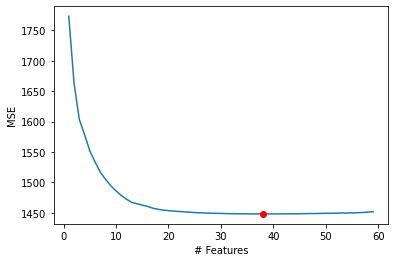

In [33]:
import matplotlib.pyplot as plt

plt.plot(models_fwd["MSE"])
plt.xlabel('# Features')
plt.ylabel('MSE')
plt.plot(models_fwd["MSE"].idxmin(), models_fwd["MSE"].min(), "or")

In [34]:
# Obtaining features of the best model 
best_features = models_fwd.loc[models_fwd['MSE'].idxmin()]['model']
print(len(best_features))
print(best_features)

38
['Accomodates', 'Room Type_Entire home/apt', 'Bathrooms', 'Property Type_Loft', 'Bedrooms', 'Property Type_Hotel', 'Distance from barycenter', 'Guests Included', 'Property Type_Serviced apartment', 'Neighborhood Group_Charlottenburg-Wilm.', 'Host Response Time_unknown', 'Neighborhood Group_NeukÃ¶lln', 'Cleanliness Rating', 'Neighborhood Group_Mitte', 'Min Nights', 'Location Rating', 'Value Rating', 'Property Type_Boutique hotel', 'Property Type_Condominium', 'Overall Rating', 'Room Type_Private room', 'Neighborhood Group_Tempelhof - SchÃ¶neberg', 'Latitude', 'Neighborhood Group_Treptow - KÃ¶penick', 'Neighborhood Group_Pankow', 'Longitude', 'Property Type_Hostel', 'Neighborhood Group_Reinickendorf', 'Property Type_Apartment', 'Property Type_Townhouse', 'Property Type_House', 'Is Superhost', 'Communication Rating', 'Host Since', 'Neighborhood Group_Friedrichshain-Kreuzberg', 'Neighborhood Group_Spandau', 'Room Type_Shared room', 'Property Type_Guest suite']


The best model is given with 38 features. However we can see from the graph that we should get good results with only around 20 features. But lets try with 38. 

### D/ Test with everything we learnt in the V part 

In [42]:
pipe = Pipeline([ ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
                      ('scaler', StandardScaler()),
                      ('lin_svr', LinearSVR(C= 0.1, dual= False, loss='squared_epsilon_insensitive', tol=0.0001))])

pipe.fit(X_train[best_features], y_train)

y_pred = pipe.predict(X_test[best_features])


mse_svr = mean_squared_error(y_pred, y_test)
mae_svr = mean_absolute_error(y_pred, y_test)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred)

print(f'MSE : {mse_svr_best}')
print(f'MAE : {mae_svr_best}')
print(f'RMSE: {rmse_svr_best}')
print(f'R2 Score: {r2_svr_best}')

MSE : 1033.6208787903295
MAE : 20.314704470247296
RMSE: 32.14997478677595
R2 Score: 0.478013174631469


In [43]:
n = len(X_train[best_features])
p = len(X_train[best_features].columns)
adj_r2_svr = 1 - (1-r2_svr)*(n-1)/(n-p-1)
print(f'Adjusted R2 Score: {adj_r2_svr }')

Adjusted R2 Score: 0.4762351629193533


We get the results 
- MSE : 1033.6208787903295
- MAE : 20.314704470247296
- RMSE: 32.14997478677595
- R2 Score: 0.478013174631469
- Adjusted R2 Score: 0.4762351629193533

The results are good ! ( Not as good as Random Forest, but at the start of this notebook we were far from having a mse of 1033 )  

## VI / Analyzing the results 

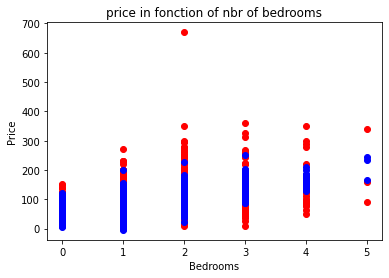

In [37]:
plt.scatter(X_test['Bedrooms'],y_test, color='red') #plotting real points
plt.scatter(X_test['Bedrooms'], y_pred ,color='blue') #plotting f

plt.title("price in fonction of nbr of bedrooms")
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

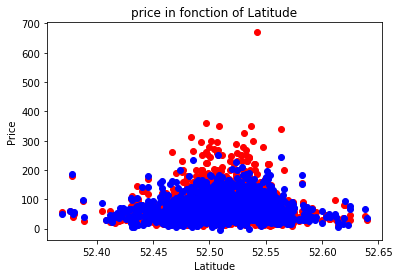

In [38]:
plt.scatter(X_test['Latitude'],y_test, color='red') #plotting real points
plt.scatter(X_test['Latitude'], y_pred,color='blue') #plotting f

plt.title("price in fonction of Latitude")
plt.xlabel('Latitude')
plt.ylabel('Price')
plt.show()

We can see the model covers the general tendancy but don't really get the high prices 

In [39]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.2 MB/s 


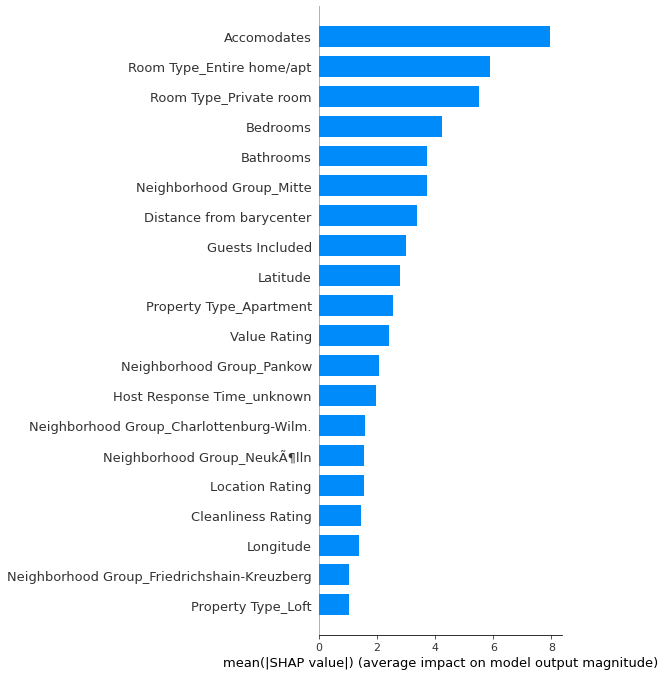

In [40]:
import shap

explainer = shap.LinearExplainer(pipe['lin_svr'], X_train_imp[best_features])
shap_values = explainer.shap_values(X_test_imp[best_features])

shap.summary_plot(shap_values, X_train_imp[best_features], plot_type="bar")

In [41]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train_imp[best_features].iloc[0,:])

With the shapley values we can see what are the important features for the model. They are more less the same then for Random Forest ( some are more important here than for RF). 

Also we can see for instance that the type of accomodation lead the price to be higher while location tends to get it down